In [23]:
import pandas as pd # dataframes (tables and data management manipulation in python)
import numpy as np # math library
import tensorflow as tf # neural network
from sklearn.model_selection import train_test_split # split training and testing method
from sklearn.preprocessing import StandardScaler   # to split data into x and y x is numerical and y is target value???? # Scale values for network compatibility
import os # for system calls
import seaborn as sns # visualisation
from matplotlib import pyplot as plt # plotting
import io, re, shutil, string


In [24]:
lc_loans_df = pd.read_csv('databases/LC_loans_granting_model_dataset.csv')
sentiment_df = pd.read_csv('databases/sentiment_analysis_gasp.csv', encoding='ISO-8859-1')
lc_loans_df

/tmp/ipykernel_5037/3519787161.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  lc_loans_df = pd.read_csv('databases/LC_loans_granting_model_dataset.csv')


,id,issue_d,revenue,dti_n,loan_amnt,fico_n,experience_c,emp_length,purpose,home_ownership_n,addr_state,zip_code,Default,title,desc
0,68407277,Dec-2015,55000.0,5.91,3600,677.0,1,10+ years,debt_consolidation,MORTGAGE,PA,190xx,0,Debt consolidation,NaN
1,68355089,Dec-2015,65000.0,16.06,24700,717.0,1,10+ years,small_business,MORTGAGE,SD,577xx,0,Business,NaN
2,68341763,Dec-2015,71000.0,13.85,20000,697.0,1,10+ years,home_improvement,MORTGAGE,IL,605xx,0,NaN,NaN
3,68476807,Dec-2015,104433.0,25.37,10400,697.0,1,3 years,major_purchase,MORTGAGE,PA,174xx,0,Major purchase,NaN
4,68426831,Dec-2015,34000.0,10.20,11950,692.0,1,4 years,debt_consolidation,RENT,GA,300xx,0,Debt consolidation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347676,89905081,Oct-2016,130000.0,20.59,18000,737.0,1,5 years,home_improvement,OWN,TX,775xx,0,Home improvement,NaN
1347677,88948836,Oct-2016,180792.0,22.03,29400,707.0,1,9 years,debt_consolidation,MORTGAGE,CA,900xx,0,Debt consolidation,NaN
1347678,89996426,Oct-2016,157000.0,10.34,32000,737.0,1,3 years,home_improvement,MORTGAGE,AZ,863xx,1,Home improvement,NaN
1347679,90006534,Oct-2016,150000.0,12.25,16000,667.0,1,10+ years,medical,RENT,NC,284xx,0,Medical expenses,NaN


/tmp/ipykernel_5037/1990669238.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


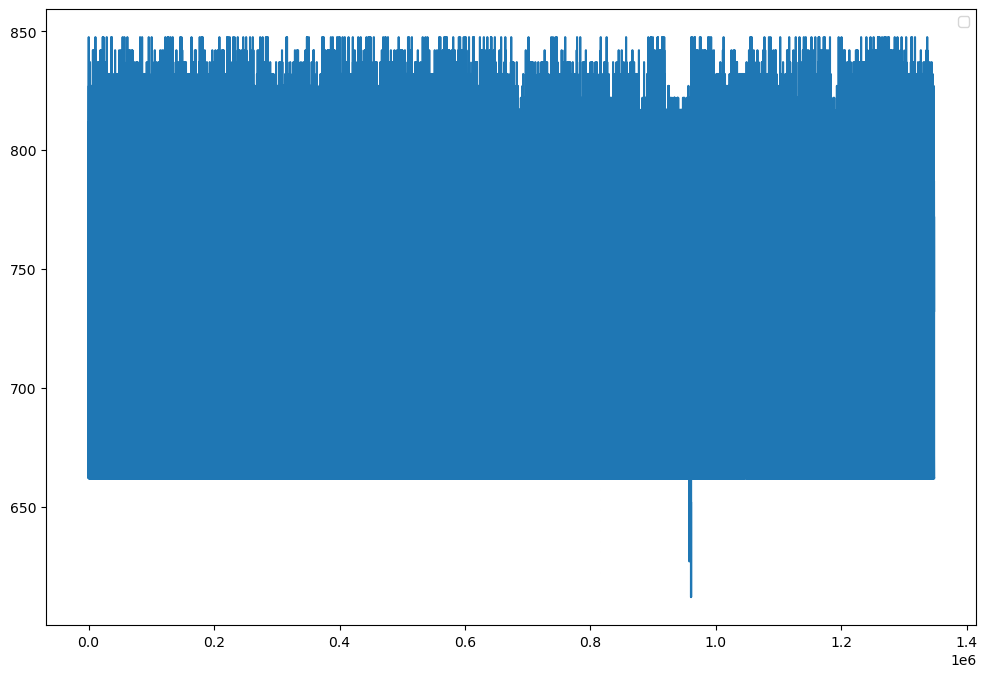

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(lc_loans_df['fico_n'])
plt.legend()

<Axes: >

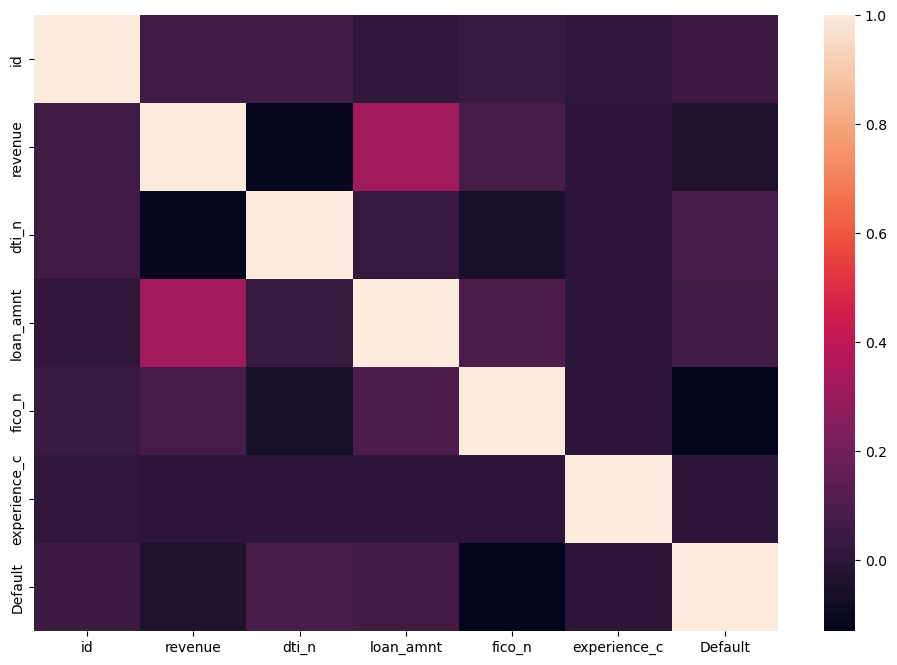

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_loans_df.select_dtypes(include='number').corr())

In [27]:
sentiment_df

,sentiment,sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [28]:
sentiment_df['sentiment'] = sentiment_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
sentiment_df

,sentiment,sentence
0,0,"According to Gran , the company has no plans t..."
1,0,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...
...,...,...
4841,0,LONDON MarketWatch -- Share prices ended lower...
4842,0,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...
4844,0,Net sales of the Paper segment decreased to EU...


In [29]:
sentiment_model = tf.keras.models.Sequential()
sentiment_model

<Sequential name=sequential_2, built=False>

In [31]:
sentences = sentiment_df['sentence'].values
labels = sentiment_df['sentiment'].values

In [33]:
sentences

array(['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
       'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
       'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
       ...,
       'Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .',
       'Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .',
       'Sales in Finland decreased by 10.5 % in Januar

In [35]:
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(4846,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [37]:
vocab_size = 1000
embedding_dim = 16
max_length = 20
oov_tok = "<OOV>"

In [38]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
tokenizer